# Essential Tools for Python Machine Learning

## NumPy Arrays

In [3]:
%matplotlib inline

In [4]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

# .format() method will display the array within the {}

x:
[[1 2 3]
 [4 5 6]]


## SciPy Sparse Matrix

In [5]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones,
# and zeros everywhere else
eye = np.eye(4)
print("\nNumPy array:\n{}".format(eye))


NumPy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


Sparse Matrix in CSR Format:

In [6]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))
# string[with{a},{b},{c}].format('a','b','c') 


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Sparse Matrix in COO Format:

In [7]:
# Create the same sparse matrix using the COO format
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("\nCOO representation:\n{}".format(eye_coo))


COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


## Matplotlib

Used to create scientific plotting in Python

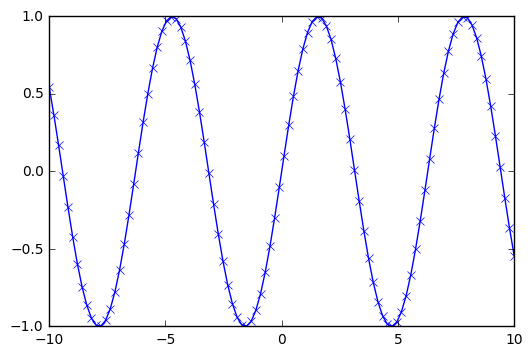

In [8]:
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps
# in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

## Pandas

Useful tool for data wragling and manipulation similar to **R DataFrame** and **SQL**. Also powerful in terms of importing data from a wide range of files.

In [9]:
import pandas as pd
# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
'Location' : ["New York", "Paris", "Berlin", "London"],
'Age' : [24, 13, 53, 33]
}
data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
print(data_pandas)

   Age  Location   Name
0   24  New York   John
1   13     Paris   Anna
2   53    Berlin  Peter
3   33    London  Linda


## mglearn

Data package prepared specific for the text book *Introductino to Machine Learning with Python* by **Andreas C. Müller** & **Sarah Guido**

In [10]:
import mglearn

## Checking the versions of packages installed

In [11]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
pandas version: 0.19.2
matplotlib version: 1.5.3
NumPy version: 1.11.3
SciPy version: 0.18.1
IPython version: 5.1.0
scikit-learn version: 0.18.1


# Taste of Machine Learning with Iris

### **Step 1:**
Load iris data from scikit-learn package and explore the data.

In [12]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("\nKeys of iris_dataset:\n{}".format(iris_dataset.keys()))


Keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The returned iris dataset comes as a *bunch* object, which is similar to a dictionary. The keys in this dictionary is listed above; we can check out  the feature names and target names.

In [13]:
print("\niris_dataset description:\n{}"
      .format(iris_dataset['feature_names']))


iris_dataset description:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
print("\nTarget names:\n{}"
      .format(iris_dataset['target_names']))


Target names:
['setosa' 'versicolor' 'virginica']


Apparently the main three "target categories" are 'setosa', 'versicolor', and 'virginica', and the variables included in the dataset are 'sepal length', 'sepal width', 'petal length', and 'petal width'. We then need to check out the real data included in the dictionary.

In [15]:
print("Type of data: {}".format(type(iris_dataset['data'])))
# Check out the type of the value to the 'data' key
print("Shape of data: {}".format(iris_dataset['data'].shape))
# Check out the .shape method of the numpy array
print("First five columns of data:\n{}"
      .format(iris_dataset['data'][:5]))
# Check out the first few rows

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


Therefore, in the data (as NumPy array), we will see the numbers corresponding to the four features. What is the first five target values of these five flowers?

In [16]:
print("Type of target: {}".format(type(iris_dataset['target'])))
# Check out the data type of the value with 'target' key
print("Shape of target: {}".format(iris_dataset['target'].shape))
# Check out the dimension of the value
print("Target:\n{}".format(iris_dataset['target'][:5]))
# Check out the contents of the array

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0]


Out of the 150 flowers included in the dataset, the first five of them are all 0, i.e. setosa.

### **Step 2:**
Split the dataset to create *training data* (or *training set*) and *test data* (or *test set*).

In standardized machine learning task, use **capital X** to represent data and use **lowercase y** to represent labels. 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
# train_test_split(features, targets, random_state) returns
# X_train, X_test, y_train, y_test
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


### **Step 3:**
Explore the data with basic visualizations

**Pair Plot** creates scatterplots for each one of the possible pairs specified in the analysis.

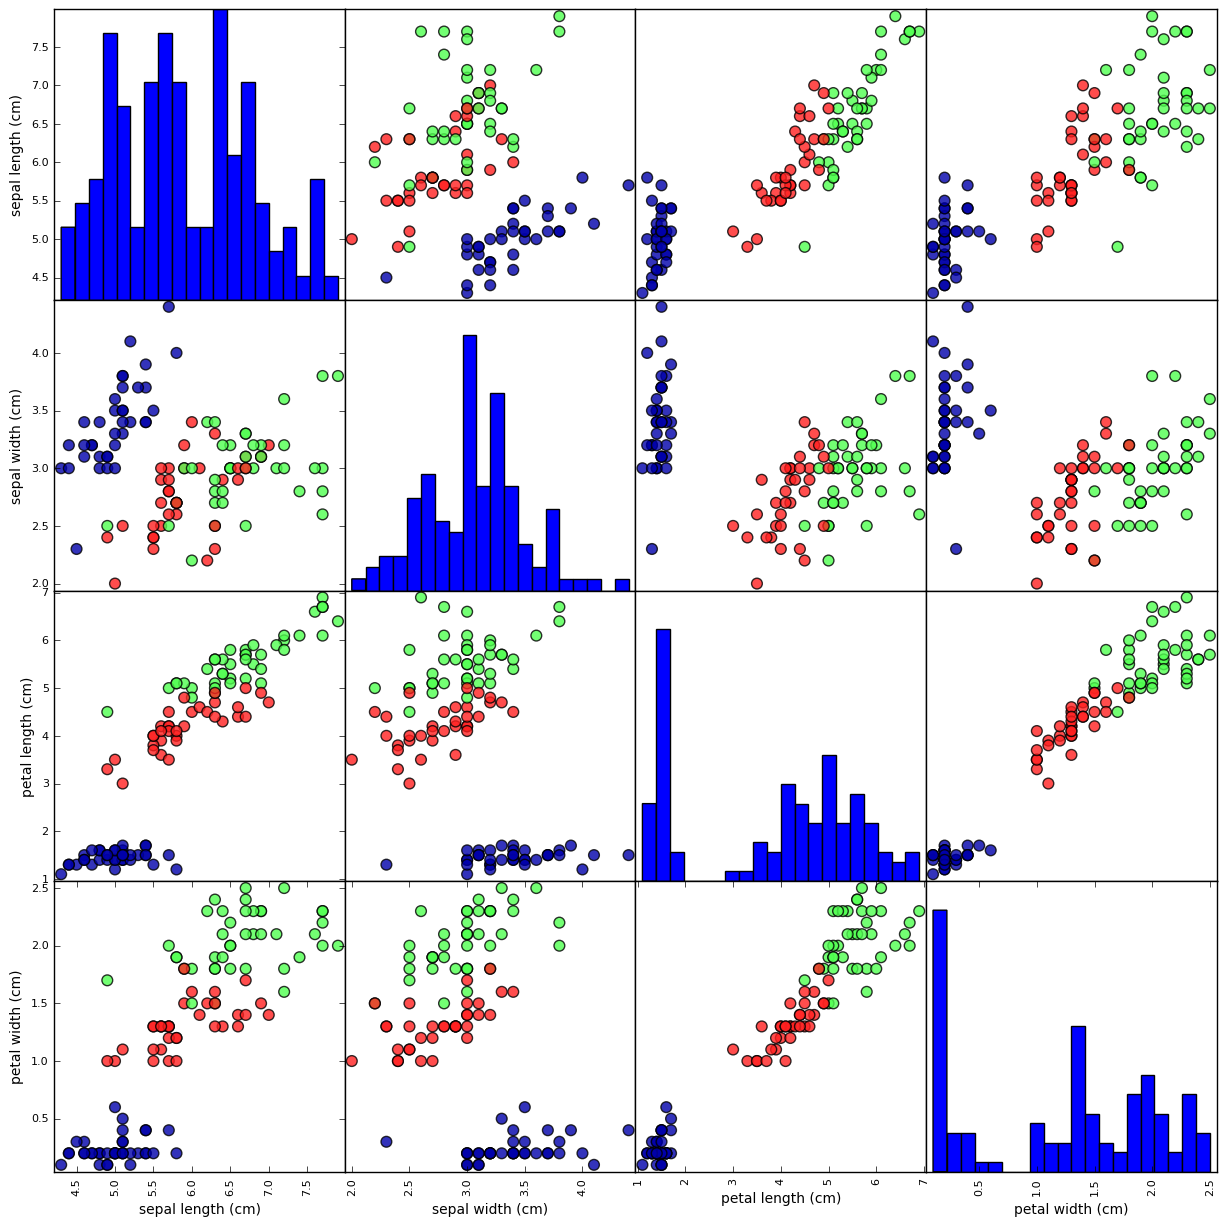

In [18]:
# To visualize the data, we need to transfer the numpy arrays into
# pandas dataframe
iris_dataframe = pd.DataFrame(X_train,
                              columns = iris_dataset.feature_names)
# Create a scatter matrix from the data frame, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                       marker='o', hist_kwds={'bins':20}, s=60,
                       alpha=.8, cmap=mglearn.cm3)

A quick glance from the data confirms that the dot categories are well seperated for most of the feature pairs, indicating that a machine learning model is doable.

### **Step 4:**
We will build a *k-Nearest Neighbors model* on the dataset.

All machine learning models in scikit-learn are implemented in their own classes, which are called *Estimator* classes. The k-nearest neighbors classification algorithm is implemented in the *KNeighborsClassifier* class in the **neighbors** module. Before
we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighborsClassifier is the *number of neighbors*, which we will set to 1.

In [19]:
# Instantiate a knn class while defining its major parameter: number
# of neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Call .fit() method on the knn object to run the algorithm on the
# training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

The resulted knn model will be automatically modified by the algorithm to best reflect on the training set.

### **Step 5:**
Use the knn model to predict the category of a unlabeled flower.

In [20]:
# Suppose we have a new unlabeled flower as X_new
X_new = np.array([[5, 2.9, 1,0.2]])
# Be sure to always create two-dimensional array for scikit-learn
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Call the .predict() method of the knn object with X_new as argument to calculate the estimated Target value.

In [22]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
        iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


However, since we don't have the actual "correct" answer about this X_new flower, we won't be able to evaluate the model. Using the X_test and y_test, however, will help us evaluate the model.

In [23]:
# Calculate the predicted values for the X_test
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [28]:
# Calculate the accuracy of the model
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))
# Alternatively, use the .score() method for the knn object
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score: 0.97


The *knn* model gives a high accuracy of 0.97 on future cases. For an easier access in future, below is the **snippet** for **knn** models:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
